# Forward propagation of uncertain temperatures

<img src="PaleoTemp.png" alt="drawing" width="600"/>

In [1]:
import pymuqModeling as mm
import pymuqApproximation as ma

import numpy as np
import matplotlib.pyplot as plt
import h5py

## Load the Model and Temperature Distribution

In [2]:
modFile = h5py.File('PaleoTempModel.h5','r')

ts = modFile['/Model/ts']
zs = modFile['/Model/zs']

A = np.array(modFile['/Model/Matrix'])
b = np.array(modFile['/Model/Offset'])

In [6]:
distFile = h5py.File('PaleoTempPrior.h5','r')

distMu = distFile['/PriorDist/Mean']
distCov = distFile['/PriorDist/Covariance']

distStd = np.sqrt(np.diag(distCov))

#### Construct a MUQ Gaussian variable

In [7]:
dist = mm.Gaussian(distMu,distCov)

#### Plot the distribution

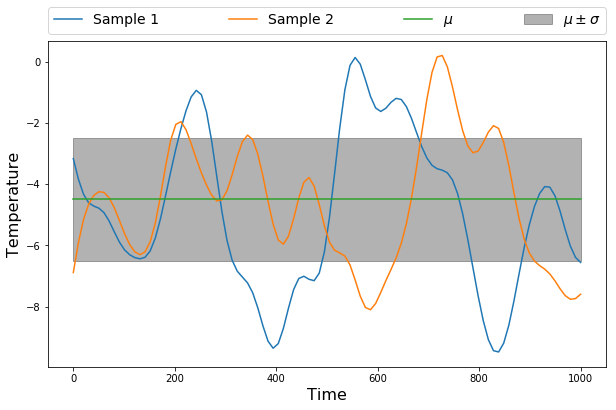

In [16]:
plt.figure(figsize=(10,6))

plt.fill_between(ts, distMu+distStd, distMu-distStd,
                 color='k',alpha=0.3,
                 label='$\mu\pm\sigma$')

# Plot a couple samples
plt.plot(ts, dist.Sample(), label='Sample 1')
plt.plot(ts, dist.Sample(), label='Sample 2')

# Plot the mean
plt.plot(ts, distMu, label='$\mu$')

# Make it pretty
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0., fontsize=14)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
plt.show()


## Compute the Predictive Distribution

In [23]:
predMu = A@distMu + b
predCov = A@distCov@A.T

predStd = np.sqrt(np.diag(predCov))

In [24]:
predDist = mm.Gaussian(predMu, predCov)

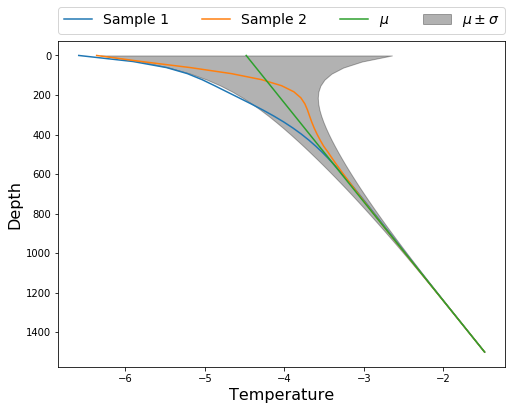

In [31]:
plt.figure(figsize=(8,6))

plt.fill_betweenx(zs, predMu+predStd, predMu-predStd,
                 color='k',alpha=0.3,
                 label='$\mu\pm\sigma$')

# Plot a couple samples
plt.plot(predDist.Sample(), zs, label='Sample 1')
plt.plot(predDist.Sample(), zs, label='Sample 2')

# Plot the mean
plt.plot(predMu,zs, label='$\mu$')

# Make it pretty
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0., fontsize=14)
plt.xlabel('Temperature', fontsize=16)
plt.ylabel('Depth', fontsize=16)
plt.show()